In [1]:
%load_ext autoreload
%autoreload 2

## This is a tutorial on `imshow` mode scenario of `plot` class.

In [2]:
# Necessary imports
import sys
import numpy as np

sys.path.insert(0, '../..')
from batchflow import plot

In [3]:
# Sample data generation
shape = (50, 50)
image = np.random.rand(*shape)

To plot an image, simply pass an array to class init.

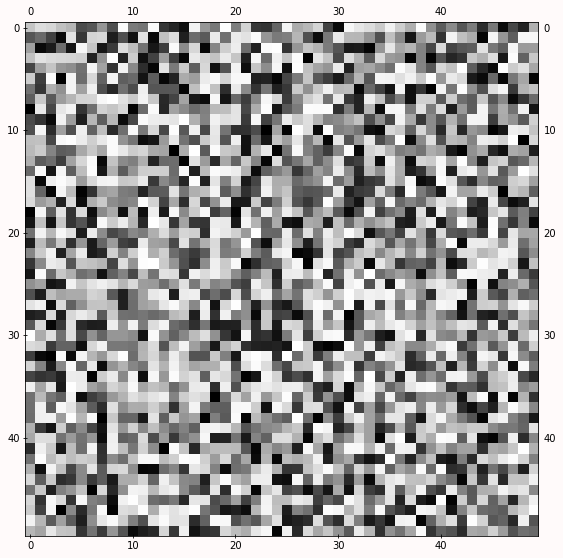

In [4]:
plot(image)

To annotate an image use parameters for correponding `matplotlib` functions.

If parameter name collision occurs, simply prefix it with specific method alias followed by underscore.

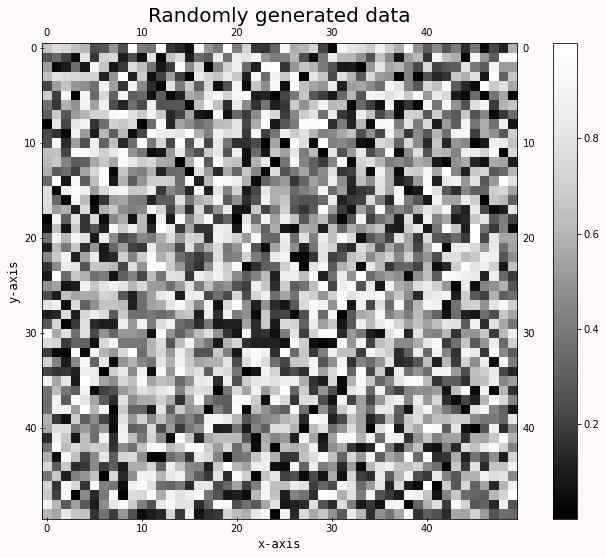

In [5]:
plot(
    data=image,
    title_label='Randomly generated data',
    xlabel='x-axis',
    title_fontsize=20,
    ylabel='y-axis',
    colorbar=True,
    family='monospace',
    # using prefix, one can redirect parameter to specific annotation method
    title_family='sans-serif'
)

To change default image display parameters use arguments valid for `plt.imshow`.

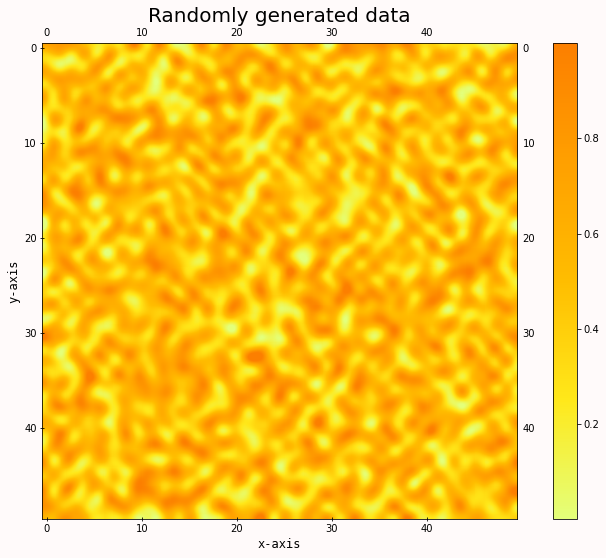

In [6]:
plot(
    data=image,
    cmap='Wistia',
    interpolation='bessel',
    title_label='Randomly generated data',
    xlabel='x-axis',
    title_fontsize=20,
    ylabel='y-axis',
    colorbar=True,
    family='monospace',
    # using prefix, one can redirect parameter to specific annotation method
    title_family='sans-serif'
)

In [7]:
# Sample mask generation.
mask_0 = np.zeros(shape)
mask_0[image > 0.5] = 1

To overlay images one over another pass them in a list.

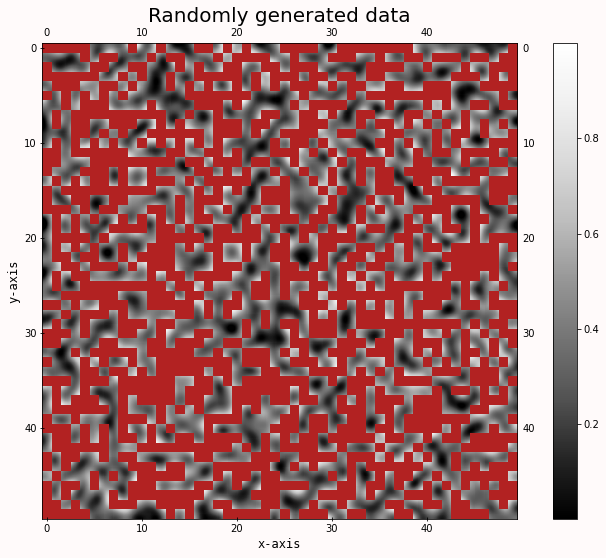

In [8]:
plot(
    data=[image, mask_0],
    interpolation=['bessel', None],
    title_label='Randomly generated data',
    xlabel='x-axis',
    title_fontsize=20,
    ylabel='y-axis',
    colorbar=True,
    family='monospace',
    # using prefix, one can redirect parameter to specific annotation method
    title_family='sans-serif'
)

In [9]:
# Sample mask generation.
mask_1 = np.zeros(shape)
mask_1[image > 0.75] = 1

One can overlay as much masks as he/she wants — masks color list is looped.

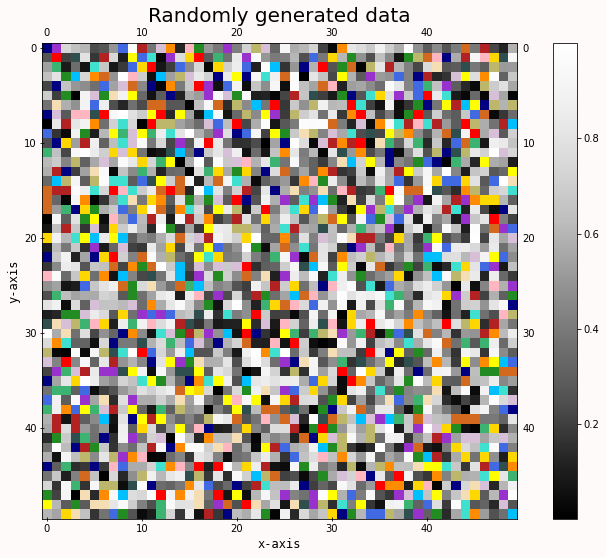

In [10]:
plot(
    data=[image] + [np.random.binomial(1, .01, shape) for _ in range(50)],
    title_label='Randomly generated data',
    xlabel='x-axis',
    title_fontsize=20,
    ylabel='y-axis',
    colorbar=True,
    family='monospace',
    # using prefix, one can redirect parameter to specific annotation method
    title_family='sans-serif'
)

If only one parameter is provided for several images, all of them are displayed with it.

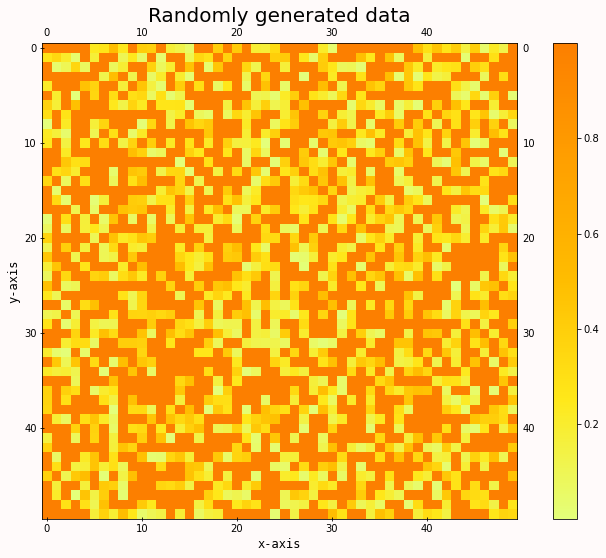

In [11]:
plot(
    data=[image, mask_0, mask_1],
    cmap='Wistia',
    title_label='Randomly generated data',
    xlabel='x-axis',
    title_fontsize=20,
    ylabel='y-axis',
    colorbar=True,
    family='monospace',
    # using prefix, one can redirect parameter to specific annotation method
    title_family='sans-serif'
)

To specify parameter for every image layer, use lists of the same length as your data is.

Note that valid matplotlib colors act as single-color cmaps, which is useful for binary mask display.

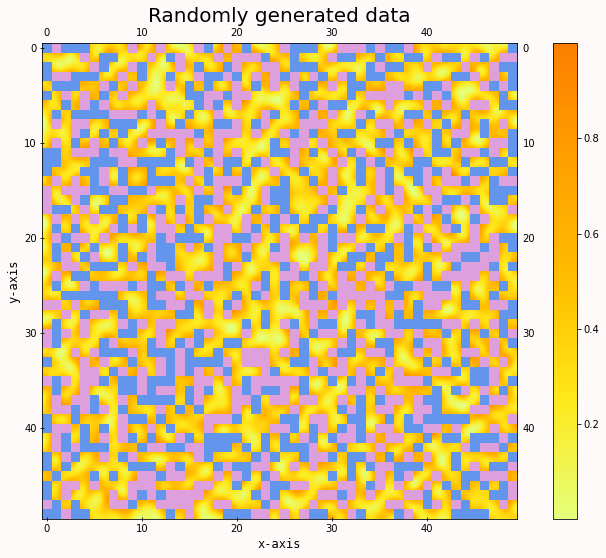

In [12]:
plot(
    data=[image, mask_0, mask_1],
    cmap=['Wistia', 'cornflowerblue', 'plum'],
    interpolation=['bessel', None, None],
    title_label='Randomly generated data',
    xlabel='x-axis',
    title_fontsize=20,
    ylabel='y-axis',
    colorbar=True,
    family='monospace',
    # using prefix, one can redirect parameter to specific annotation method
    title_family='sans-serif'
)

If one does not specify legend colors explicitly (i.e. with `'legend_'` prefix), legend labels are created only for layers displayed in a single color.

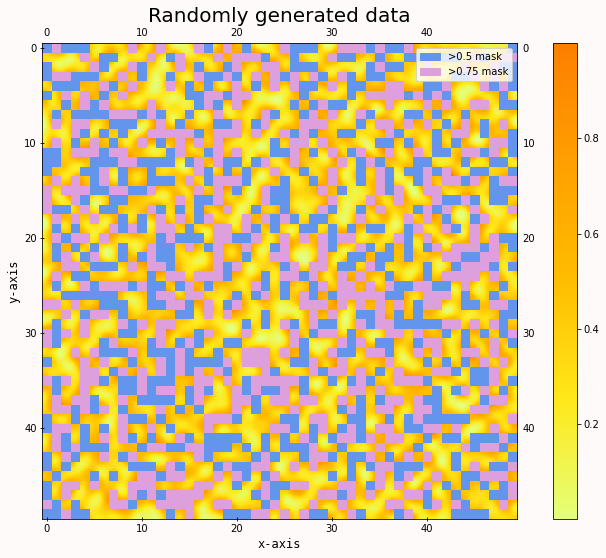

In [13]:
plot(
    data=[image, mask_0, mask_1],
    cmap=['Wistia', 'cornflowerblue', 'plum'],
    interpolation=['bessel', None, None],
    title_label='Randomly generated data',
    xlabel='x-axis',
    title_fontsize=20,
    ylabel='y-axis',
    colorbar=True,
    family='monospace',
    # using prefix, one can redirect parameter to specific annotation method
    title_family='sans-serif',
    label=['>0.5 mask', '>0.75 mask']
)

To display given images separately, use `combine='separate'`.

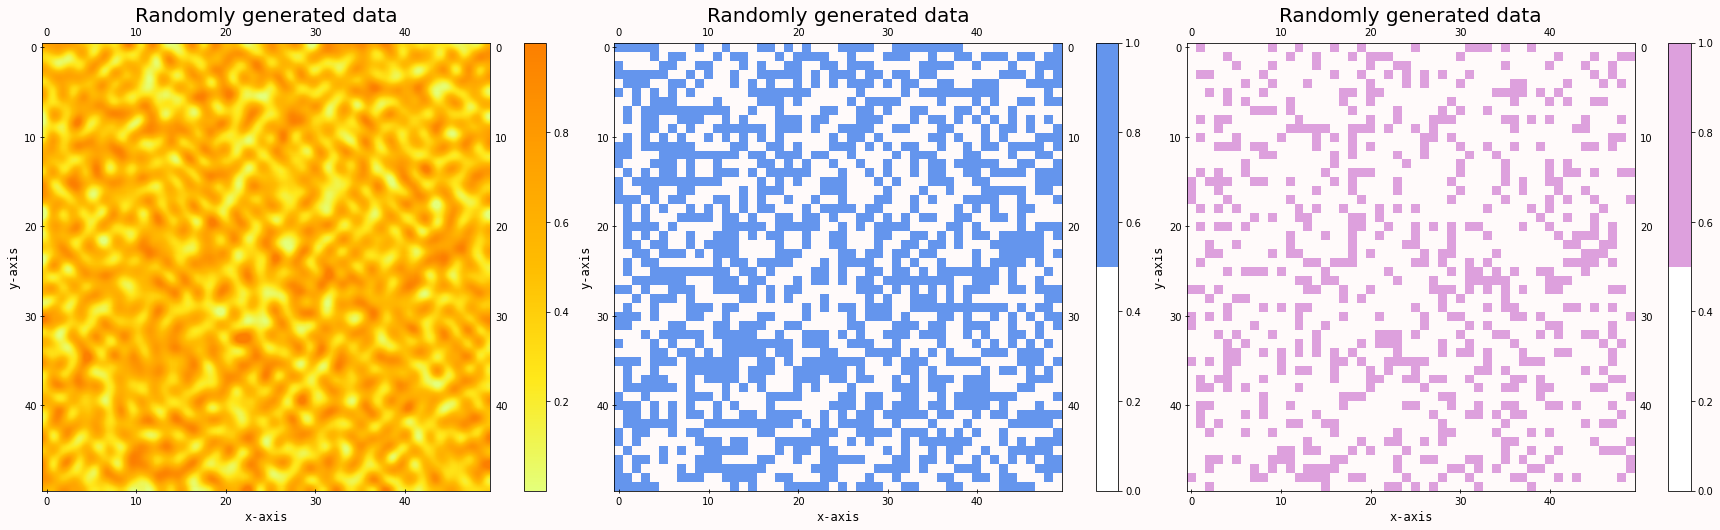

In [14]:
plot(
    data=[image, mask_0, mask_1],
    combine='separate',
    cmap=['Wistia', 'cornflowerblue', 'plum'],
    interpolation=['bessel', None, None],
    title_label='Randomly generated data',
    xlabel='x-axis',
    title_fontsize=20,
    ylabel='y-axis',
    colorbar=True,
    family='monospace',
    # using prefix, one can redirect parameter to specific annotation method
    title_family='sans-serif',
)

Some parameters have one or more aliases (e.g. to pass title label value one can use `title_label`, `title` or `label` keywords)

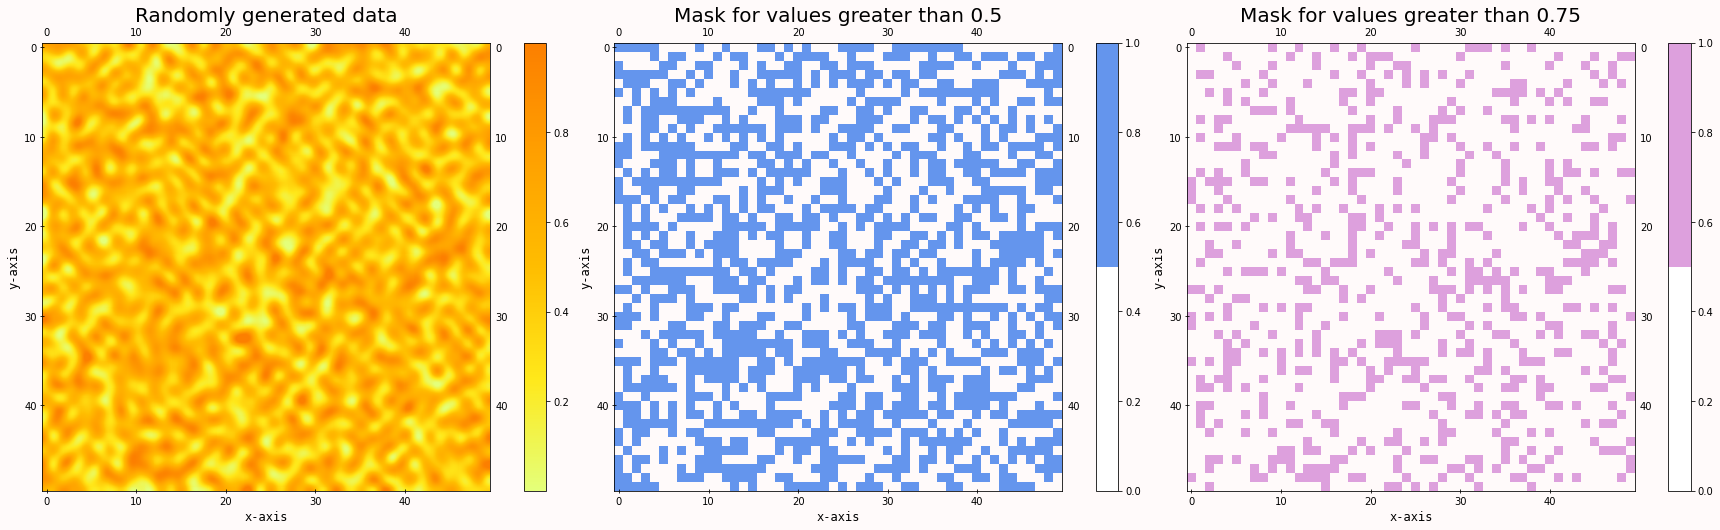

In [15]:
plot(
    data=[image, mask_0, mask_1],
    combine='separate',
    cmap=['Wistia', 'cornflowerblue', 'plum'],
    interpolation=['bessel', None, None],
    title_label='Randomly generated data',
    xlabel='x-axis',
    title_fontsize=20,
    ylabel='y-axis',
    colorbar=True,
    family='monospace',
    # using prefix, one can redirect parameter to specific annotation method
    title_family='sans-serif',
    title=['Randomly generated data',
           'Mask for values greater than 0.5',
           'Mask for values greater than 0.75']
)

Colorbar can be disabled for chosen images.

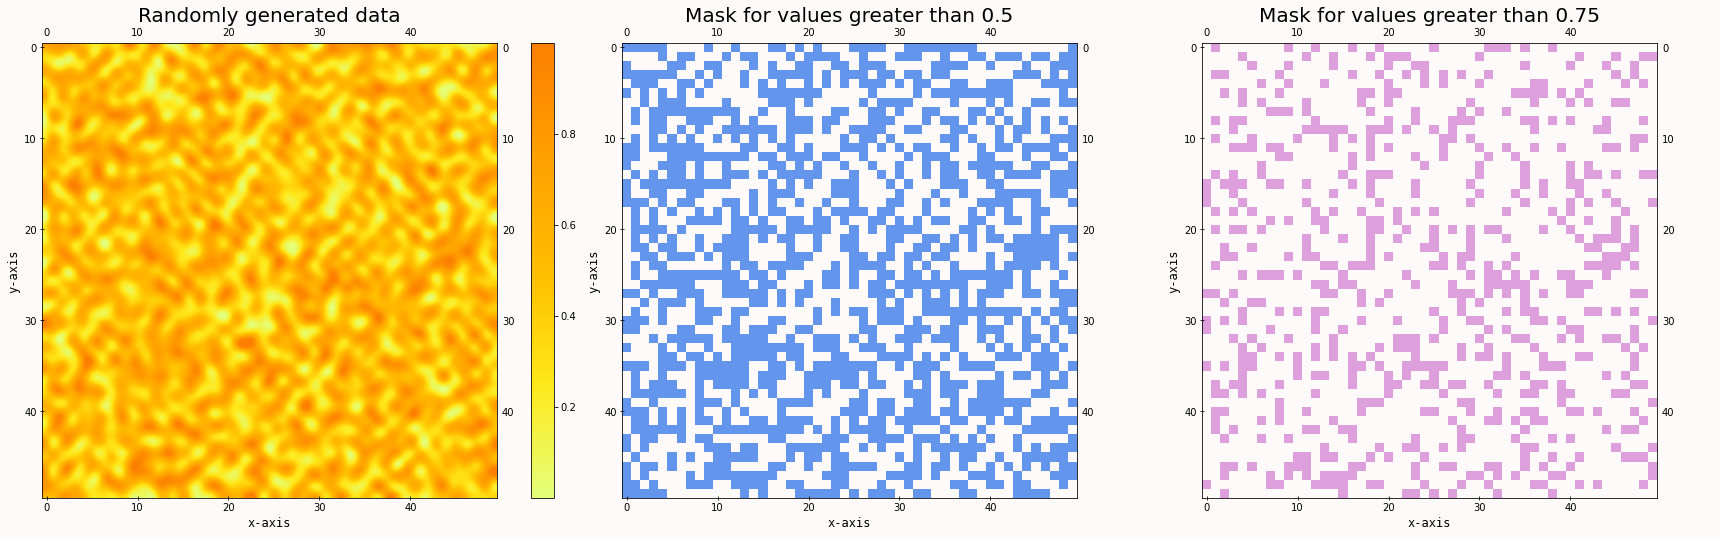

In [16]:
plot(
    data=[image, mask_0, mask_1],
    combine='separate',
    cmap=['Wistia', 'cornflowerblue', 'plum'],
    interpolation=['bessel', None, None],
    title_label='Randomly generated data',
    xlabel='x-axis',
    title_fontsize=20,
    ylabel='y-axis',
    family='monospace',
    # using prefix, one can redirect parameter to specific annotation method
    title_family='sans-serif',
    title=['Randomly generated data',
           'Mask for values greater than 0.5',
           'Mask for values greater than 0.75'],
    colorbar=[True, False, False],
)

To display images in ``'mixed'`` manner, i.e. with some image overlaid and some displayed separately, use nested lists of image arrays.

If list has level 2 nestedness, outer level defines subplots order while inner one defines layers order.

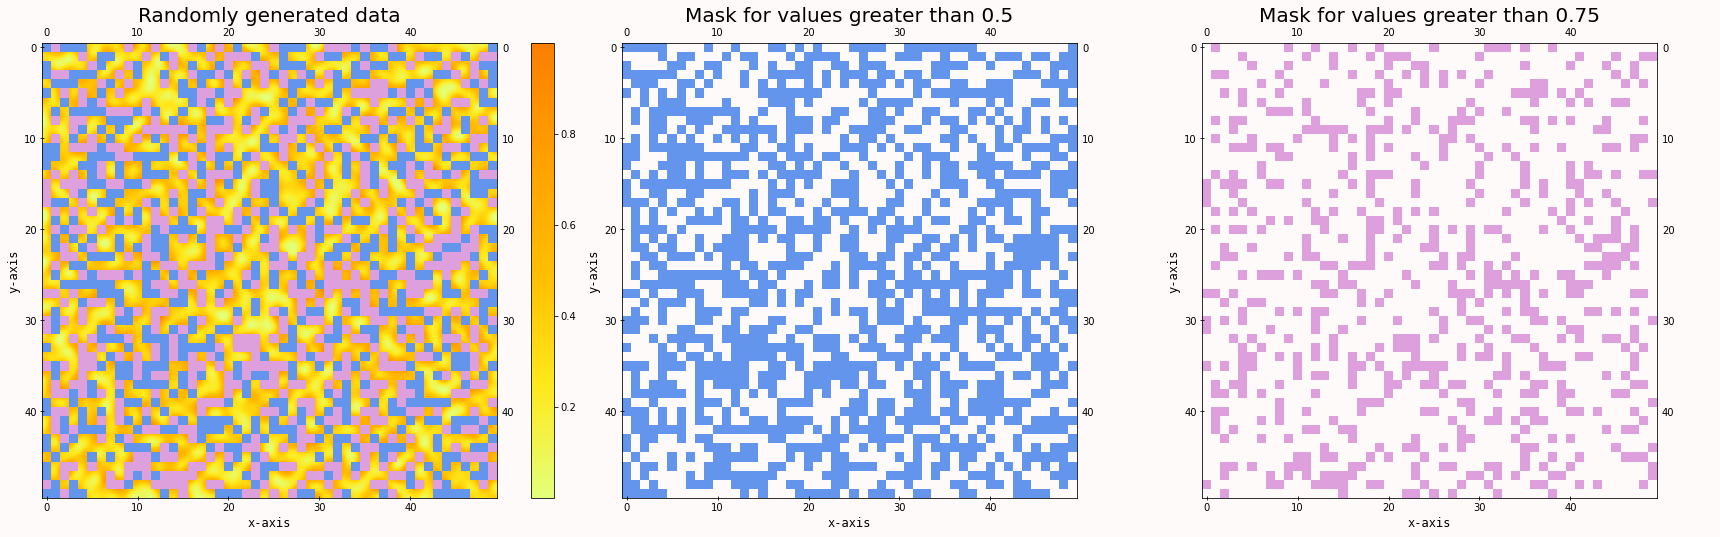

In [17]:
plot(
    data=[[image, mask_0, mask_1], mask_0, mask_1],
    combine='separate',
    cmap=[['Wistia', 'cornflowerblue', 'plum'], 'cornflowerblue', 'plum'],
    interpolation=[['bessel', None, None], None, None],
    title_label='Randomly generated data',
    xlabel='x-axis',
    title_fontsize=20,
    ylabel='y-axis',
    family='monospace',
    # using prefix, one can redirect parameter to specific annotation method
    title_family='sans-serif',
    title=['Randomly generated data',
           'Mask for values greater than 0.5',
           'Mask for values greater than 0.75'],
    colorbar=[True, False, False],
)

Use `None` in data list to skip keep subplot empty.

One can access modify it later, accessing  and `fig`/`axes` attributes if `plot` class instances.

Note that `None` placeholders for parameters corresponding to empty axis are not needed.

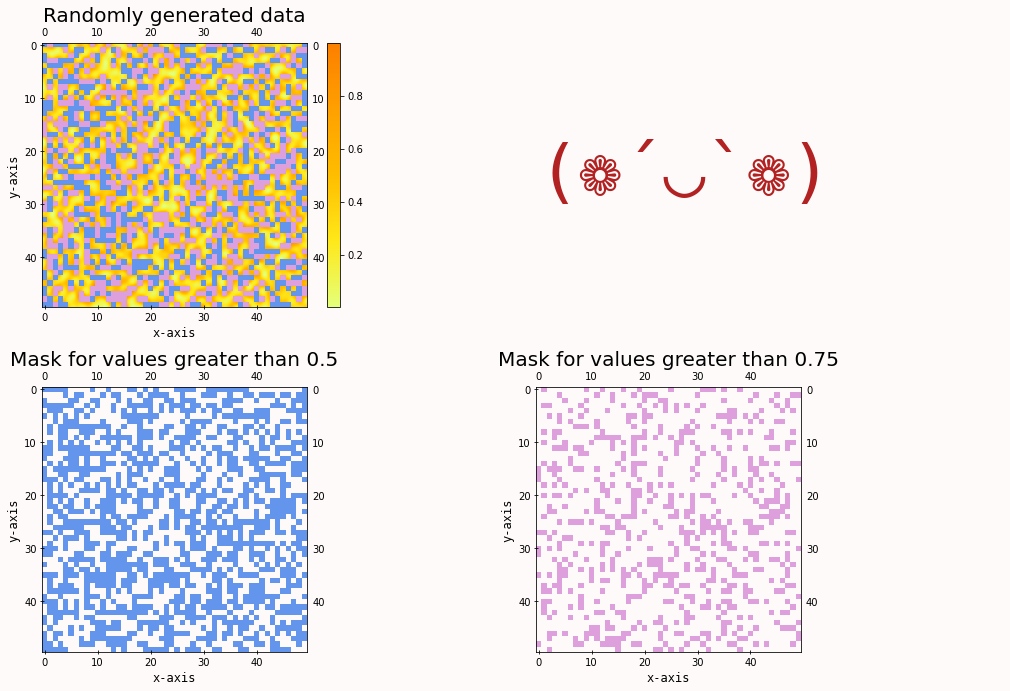

In [18]:
canvas = plot(
    data=[[image, mask_0, mask_1], None, mask_0, mask_1],
    combine='separate',
    ncols=2,
    cmap=[['Wistia', 'cornflowerblue', 'plum'], 'cornflowerblue', 'plum'],
    interpolation=[['bessel', None, None], None, None],
    title_label='Randomly generated data',
    xlabel='x-axis',
    title_fontsize=20,
    ylabel='y-axis',
    family='monospace',
    # using prefix, one can redirect parameter to specific annotation method
    title_family='sans-serif',
    title=['Randomly generated data',
           'Mask for values greater than 0.5',
           'Mask for values greater than 0.75'],
    colorbar=[True, False, False],
)

canvas.axes[1].text(0.5, 0.5, '(❁´◡`❁)', ha="center", va="center",
                    fontsize=70, color='firebrick', family='monospace')

canvas

If you have a bunch of different-shaped images, the `plot` will manage optimal figsize itself.

And while `figsize` parameter is still available, one might find using `scale` option more convenient.

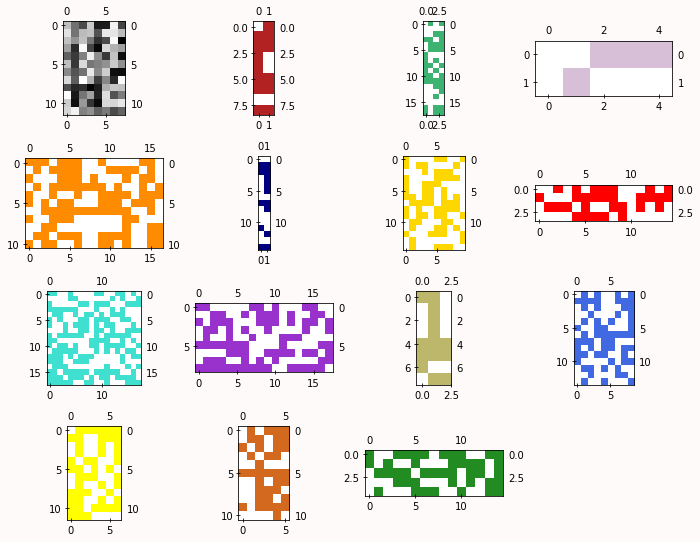

In [25]:
data = [[np.random.rand(*np.random.randint(2, 20, 2))] for _ in range(np.random.randint(10, 20))]
plot(data, scale=0.3)